In [37]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### 1. Load train, test and validation data

In [38]:
with open('../../data/processed/autoencoder_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = np.array(data['X_train'])
X_test = np.array(data['X_test'])
X_val = np.array(data['X_val'])

In [39]:
y_test = set(data['y_test'])
y_train = set(data['y_train'])
y_val = set(data['y_val'])

#### 2. Define the autoencoder model

In [40]:
from keras.optimizers import Adam
from keras.models import Model, clone_model
from keras.callbacks import EarlyStopping
from keras.layers import Input, BatchNormalization, Dense, ReLU, LeakyReLU

In [63]:
def build_autoencoder(activation_fn):
    input_signal = Input(shape=(600,))

    layer_1 = Dense(256)(input_signal)
    layer_1 = BatchNormalization()(layer_1)
    layer_1 = activation_fn()(layer_1)

    layer_2 = Dense(128)(layer_1)
    layer_2 = BatchNormalization()(layer_2)
    layer_2 = activation_fn()(layer_2)

    layer_3 = Dense(64)(layer_2)
    layer_3 = BatchNormalization()(layer_3)
    layer_3 = activation_fn()(layer_3)

    layer_4 = Dense(25)(layer_3)
    layer_4 = BatchNormalization()(layer_4)
    layer_4 = activation_fn()(layer_4)

    encoder = Model(input_signal, layer_4)

    latent_sample = Input(shape=(25,))

    layer_1 = Dense(64)(latent_sample)
    layer_1 = BatchNormalization()(layer_1)
    layer_1 = activation_fn()(layer_1)

    layer_2 = Dense(128)(layer_1)
    layer_2 = BatchNormalization()(layer_2)
    layer_2 = activation_fn()(layer_2)

    layer_3 = Dense(256)(layer_2)
    layer_3 = BatchNormalization()(layer_3)
    layer_3 = activation_fn()(layer_3)

    layer_4 = Dense(600)(layer_3)
    layer_4 = BatchNormalization()(layer_4)
    layer_4 = activation_fn()(layer_4)

    decoder = Model(latent_sample, layer_4)

    autoencoder = Model(input_signal, decoder(encoder(input_signal)))

    return autoencoder, encoder, decoder

In [66]:
autoencoder_relu, encoder_relu, decoder_relu = build_autoencoder(ReLU)

In [68]:
autoencoder_leaky, encoder_leaky, decoder_leaky = build_autoencoder(LeakyReLU)

In [70]:
encoder_relu.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       153,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_36 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_37 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_38 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_39 (ReLU)                 │ (None, 25)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,525 (775.49 KB)

 Trainable params: 197,579 (771.79 KB)

 Non-trainable params: 946 (3.70 KB)

In [71]:
decoder_relu.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_40 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_41 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_42 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 600)            │       154,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 600)            │         2,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_43 (ReLU)                 │ (None, 600)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,400 (786.72 KB)

 Trainable params: 199,304 (778.53 KB)

 Non-trainable params: 2,096 (8.19 KB)

In [72]:
autoencoder_relu.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_7 (Functional)       │ (None, 25)             │       198,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_9 (Functional)       │ (None, 600)            │       201,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,925 (1.53 MB)

 Trainable params: 396,883 (1.51 MB)

 Non-trainable params: 3,042 (11.88 KB)

#### 3. Hyperparameter optimisation

In [6]:
epochs = 100
batch_sizes = [32, 64, 128, 256]
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2]

##### 3.1. Learning rate

In [7]:
history_arr = []
batch_size = 32
for learning_rate in learning_rates:
    history_dict = {
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'history': []
    }
    for _ in range(5):
        tmp_model = clone_model(autoencoder)
        tmp_model.compile(
            optimizer=Adam(learning_rate=learning_rate), 
            loss='mean_squared_error'
        )
        history = tmp_model.fit(
            X_train, X_train,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=False,
            validation_data=(X_val, X_val)
        )
        history_dict['history'].append(history.history)
    history_arr.append(history_dict)

Epoch 1/100


I0000 00:00:1719422562.285331  331082 service.cc:145] XLA service 0x7fd124005660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719422562.285355  331082 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-06-26 18:22:42.303018: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-26 18:22:42.385728: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 215/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 0.1230

I0000 00:00:1719422562.760512  331082 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1816/1816 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0699 - val_loss: 0.0191
Epoch 2/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - loss: 0.0102 - val_loss: 0.0064
Epoch 3/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - loss: 0.0050 - val_loss: 0.0054
Epoch 4/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - loss: 0.0041 - val_loss: 0.0044
Epoch 5/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - loss: 0.0035 - val_loss: 0.0039
Epoch 6/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 0.0032 - val_loss: 0.0037
Epoch 7/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - loss: 0.0030 - val_loss: 0.0036
Epoch 8/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - loss: 0.0028 - val_loss: 0.0034
Epoch 9/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - loss: 0.0027 - val_loss: 0.0032
Epoch 10/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 11/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.0023 - val_loss: 0.0027
Epoch 12/10

In [8]:
import json
with open('experiments/autoencoder_history_lr.json', 'w') as f:
    json.dump(history_arr, f)

##### 3.2. Mini-batch size

In [9]:
history_arr = []
learning_rate = 1e-4
for batch_size in batch_sizes:
    history_dict = {
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'history': []
    }
    for _ in range(5):
        tmp_model = clone_model(autoencoder)
        tmp_model.compile(
            optimizer=Adam(learning_rate=learning_rate), 
            loss='mean_squared_error'
        )
        history = tmp_model.fit(
            X_train, X_train,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=False,
            validation_data=(X_val, X_val)
        )
        history_dict['history'].append(history.history)
    history_arr.append(history_dict)

Epoch 1/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 3s 990us/step - loss: 0.0275 - val_loss: 0.0049
Epoch 2/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - loss: 0.0034 - val_loss: 0.0026
Epoch 3/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 5/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 9.9634e-04 - val_loss: 0.0011
Epoch 9/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 0.0010 - val_loss: 9.9098e-04
Epoch 10/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.0010 - val_loss: 9.6702e-04
Epoch 11/100
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - loss: 9.1447e-04 

In [10]:
with open('experiments/autoencoder_history_batch.json', 'w') as f:
    json.dump(history_arr, f)

#### 4. Visualise training history results

In [35]:
with open('experiments/autoencoder_history_lr.json', 'r') as f:
    history_arr = json.load(f)

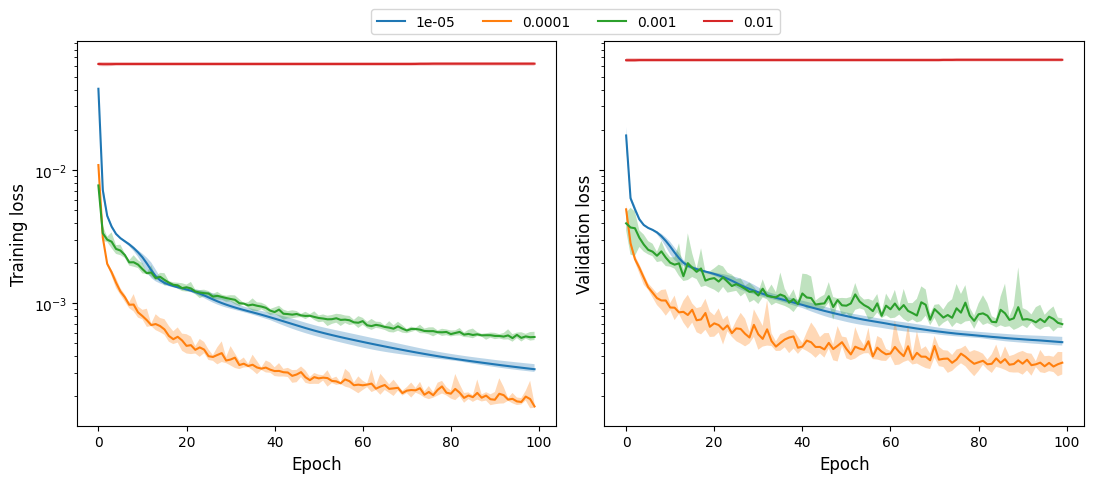

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), sharey=True)
for history_dict in history_arr:
    label = f'{history_dict["learning_rate"]}'
    mean_train_loss = np.mean([history['loss'] for history in history_dict['history']], axis=0)
    mean_val_loss = np.mean([history['val_loss'] for history in history_dict['history']], axis=0)
    max_train_loss = np.max([history['loss'] for history in history_dict['history']], axis=0)
    max_val_loss = np.max([history['val_loss'] for history in history_dict['history']], axis=0)
    min_train_loss = np.min([history['loss'] for history in history_dict['history']], axis=0)
    min_val_loss = np.min([history['val_loss'] for history in history_dict['history']], axis=0)
    ax[0].plot(mean_train_loss, label=label)
    ax[0].fill_between(range(len(mean_train_loss)), min_train_loss, max_train_loss, alpha=0.3)
    ax[1].plot(mean_val_loss, label=label)
    ax[1].fill_between(range(len(mean_val_loss)), min_val_loss, max_val_loss, alpha=0.3)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Training loss', fontsize=12)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Validation loss', fontsize=12)
ax[0].semilogy()
ax[1].semilogy()
ax[0].legend(bbox_to_anchor=(0.6, 1.1), ncols=4, loc='upper left')
fig.subplots_adjust(wspace=0.1)
plt.savefig('figures/autoencoder_lr_history.pdf', bbox_inches='tight')
plt.show()

In [36]:
# Print the difference between the training and validation loss
for history_dict in history_arr:
    mean_train_loss = np.mean([history['loss'] for history in history_dict['history']], axis=0)
    mean_val_loss = np.mean([history['val_loss'] for history in history_dict['history']], axis=0)
    print(f'Learning rate: {history_dict["learning_rate"]}, Difference: {mean_train_loss[-1] - mean_val_loss[-1]}')

Learning rate: 1e-05, Difference: -0.0001906148158013821
Learning rate: 0.0001, Difference: -0.00018997378356289119
Learning rate: 0.001, Difference: -0.0001388252247124911
Learning rate: 0.01, Difference: -0.00435895100235939


In [30]:
with open('experiments/autoencoder_history_batch.json', 'r') as f:
    history_arr = json.load(f)

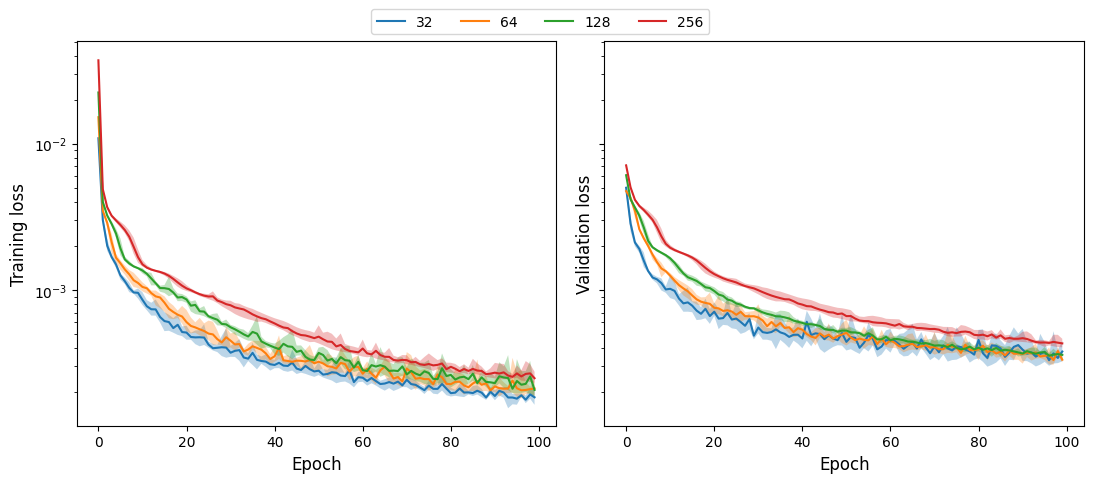

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), sharey=True)
for history_dict in history_arr:
    label = f'{history_dict["batch_size"]}'
    mean_train_loss = np.mean([history['loss'] for history in history_dict['history']], axis=0)
    mean_val_loss = np.mean([history['val_loss'] for history in history_dict['history']], axis=0)
    max_train_loss = np.max([history['loss'] for history in history_dict['history']], axis=0)
    max_val_loss = np.max([history['val_loss'] for history in history_dict['history']], axis=0)
    min_train_loss = np.min([history['loss'] for history in history_dict['history']], axis=0)
    min_val_loss = np.min([history['val_loss'] for history in history_dict['history']], axis=0)
    ax[0].plot(mean_train_loss, label=label)
    ax[0].fill_between(range(len(mean_train_loss)), min_train_loss, max_train_loss, alpha=0.3)
    ax[1].plot(mean_val_loss, label=label)
    ax[1].fill_between(range(len(mean_val_loss)), min_val_loss, max_val_loss, alpha=0.3)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Training loss', fontsize=12)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Validation loss', fontsize=12)
ax[0].semilogy()
ax[1].semilogy()
ax[0].legend(bbox_to_anchor=(0.6, 1.1), ncols=4, loc='upper left')
fig.subplots_adjust(wspace=0.1)
plt.savefig('figures/autoencoder_batch_history.pdf', bbox_inches='tight')
plt.show()

In [33]:
# Print the difference between mean training and validation loss
for history_dict in history_arr:
    mean_train_loss = np.mean([history['loss'] for history in history_dict['history']], axis=0)
    mean_val_loss = np.mean([history['val_loss'] for history in history_dict['history']], axis=0)
    print(f'Batch size: {history_dict["batch_size"]}, Difference: {mean_train_loss[-1] - mean_val_loss[-1]}')

Batch size: 32, Difference: -0.00019470938423182815
Batch size: 64, Difference: -0.00012138470192439856
Batch size: 128, Difference: -0.00015270377625711264
Batch size: 256, Difference: -0.00018185242370236663


#### 5. Train and save a model with optimal hyperparameters

In [74]:
optimizer = Adam(learning_rate=1e-4)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
autoencoder_relu.compile(optimizer=optimizer, loss='mean_squared_error')
history = autoencoder_relu.fit(
    X_train, X_train,
    epochs=500,
    batch_size=64,
    shuffle=False,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
)

Epoch 1/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1465 - val_loss: 0.0617
Epoch 2/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0294 - val_loss: 0.0568
Epoch 3/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0243 - val_loss: 0.0535
Epoch 4/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0214 - val_loss: 0.0482
Epoch 5/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0199 - val_loss: 0.0517
Epoch 6/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0185 - val_loss: 0.0403
Epoch 7/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0168 - val_loss: 0.0513
Epoch 8/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0160 - val_loss: 0.0218
Epoch 9/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0151 - val_loss: 0.0234
Epoch 10/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0151 - val_loss: 0.0325
Epoch 11/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0143 - val_loss: 0.0170
Epoch 12/500
908/908 ━━━━━━━━━━━━━━━━━━━━

In [75]:
autoencoder_relu.save('../../models/dense/ReLU_BatchNorm_Latent25_256-128-64.keras')

In [77]:
optimizer = Adam(learning_rate=1e-4)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
autoencoder_leaky.compile(optimizer=optimizer, loss='mean_squared_error')
history = autoencoder_leaky.fit(
    X_train, X_train,
    epochs=500,
    batch_size=64,
    shuffle=False,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
)

Epoch 1/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2722 - val_loss: 2.2019
Epoch 2/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1283 - val_loss: 1.9211
Epoch 3/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1083 - val_loss: 1.3951
Epoch 4/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0921 - val_loss: 1.3957
Epoch 5/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0772 - val_loss: 0.9314
Epoch 6/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0642 - val_loss: 1.5345
Epoch 7/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0527 - val_loss: 2.0544
Epoch 8/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0427 - val_loss: 1.2881
Epoch 9/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0346 - val_loss: 1.3726
Epoch 10/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0281 - val_loss: 0.5151
Epoch 11/500
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0228 - val_loss: 0.3060
Epoch 12/500
908/908 ━━━━━━━━━━━━━━━━━━━━

In [78]:
autoencoder_leaky.save('../../models/dense/LeakyReLU_BatchNorm_Latent25_256-128-64.keras')

#### 6. Evaluate model on test data 

In [49]:
from tensorflow.keras.models import load_model
autoencoder = load_model('../../models/dense/ReLU_BatchNorm_Latent25_256-128-64.keras')

In [50]:
test_loss = autoencoder.evaluate(X_test, X_test)
print(f'Test loss: {test_loss}')

607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - loss: 0.0167
Test loss: 0.01666915975511074


In [51]:
y_pred = autoencoder.predict(X_test)
y_pred.shape

607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step


(19400, 600)

In [52]:
# Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(y_pred - X_test), axis=1)
reconstruction_error.shape

(19400,)

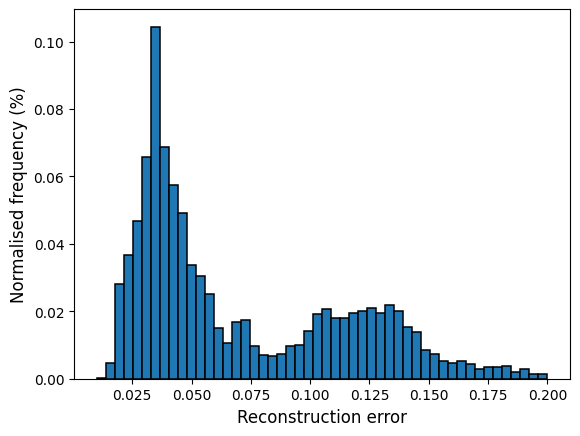

In [53]:
weights = np.ones_like(reconstruction_error) / float(len(reconstruction_error))

fig, ax = plt.subplots()
ax.hist(reconstruction_error, bins=50, range=(0.01, 0.2), weights=weights, edgecolor='black', linewidth=1.1)
ax.set_xlabel('Reconstruction error', fontsize=12)
ax.set_ylabel('Normalised frequency (%)', fontsize=12)
# plt.savefig('figures/autoencoder_reconstruction_error_relu.pdf', bbox_inches='tight')
plt.show()

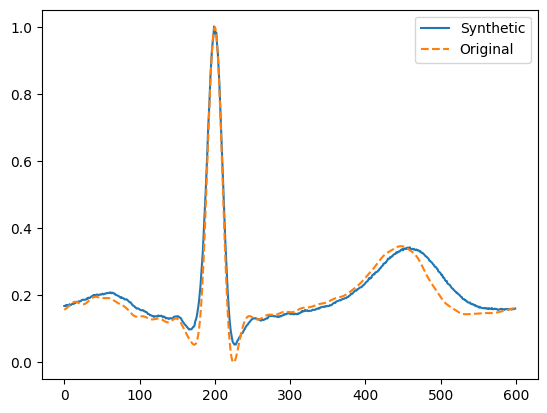

In [54]:
fig, ax = plt.subplots()
ax.plot(y_pred[-1], label='Synthetic')
ax.plot(X_test[-1], '--', label='Original')
ax.legend()
plt.show()

#### 7. Probabilistic Model

In [28]:
import sys
sys.path.append('../../') # Append the path to the root of the project to sys.path
from src.dataset import EcgSignalProcessor

In [32]:
with open('../../data/processed/autoencoder_data.pkl', 'rb') as f:
    ecg_data = pickle.load(f)
test_user_ids = list(set(ecg_data['y_test']))
print(test_user_ids[42])

592


In [34]:
ecg_processor = EcgSignalProcessor(
    data_path='../../data/raw/autonomic-aging-cardiovascular/1.0.0', 
    templates_to_extract=1000
)
X = ecg_processor.read_user_ecg_signals(test_user_ids[42])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


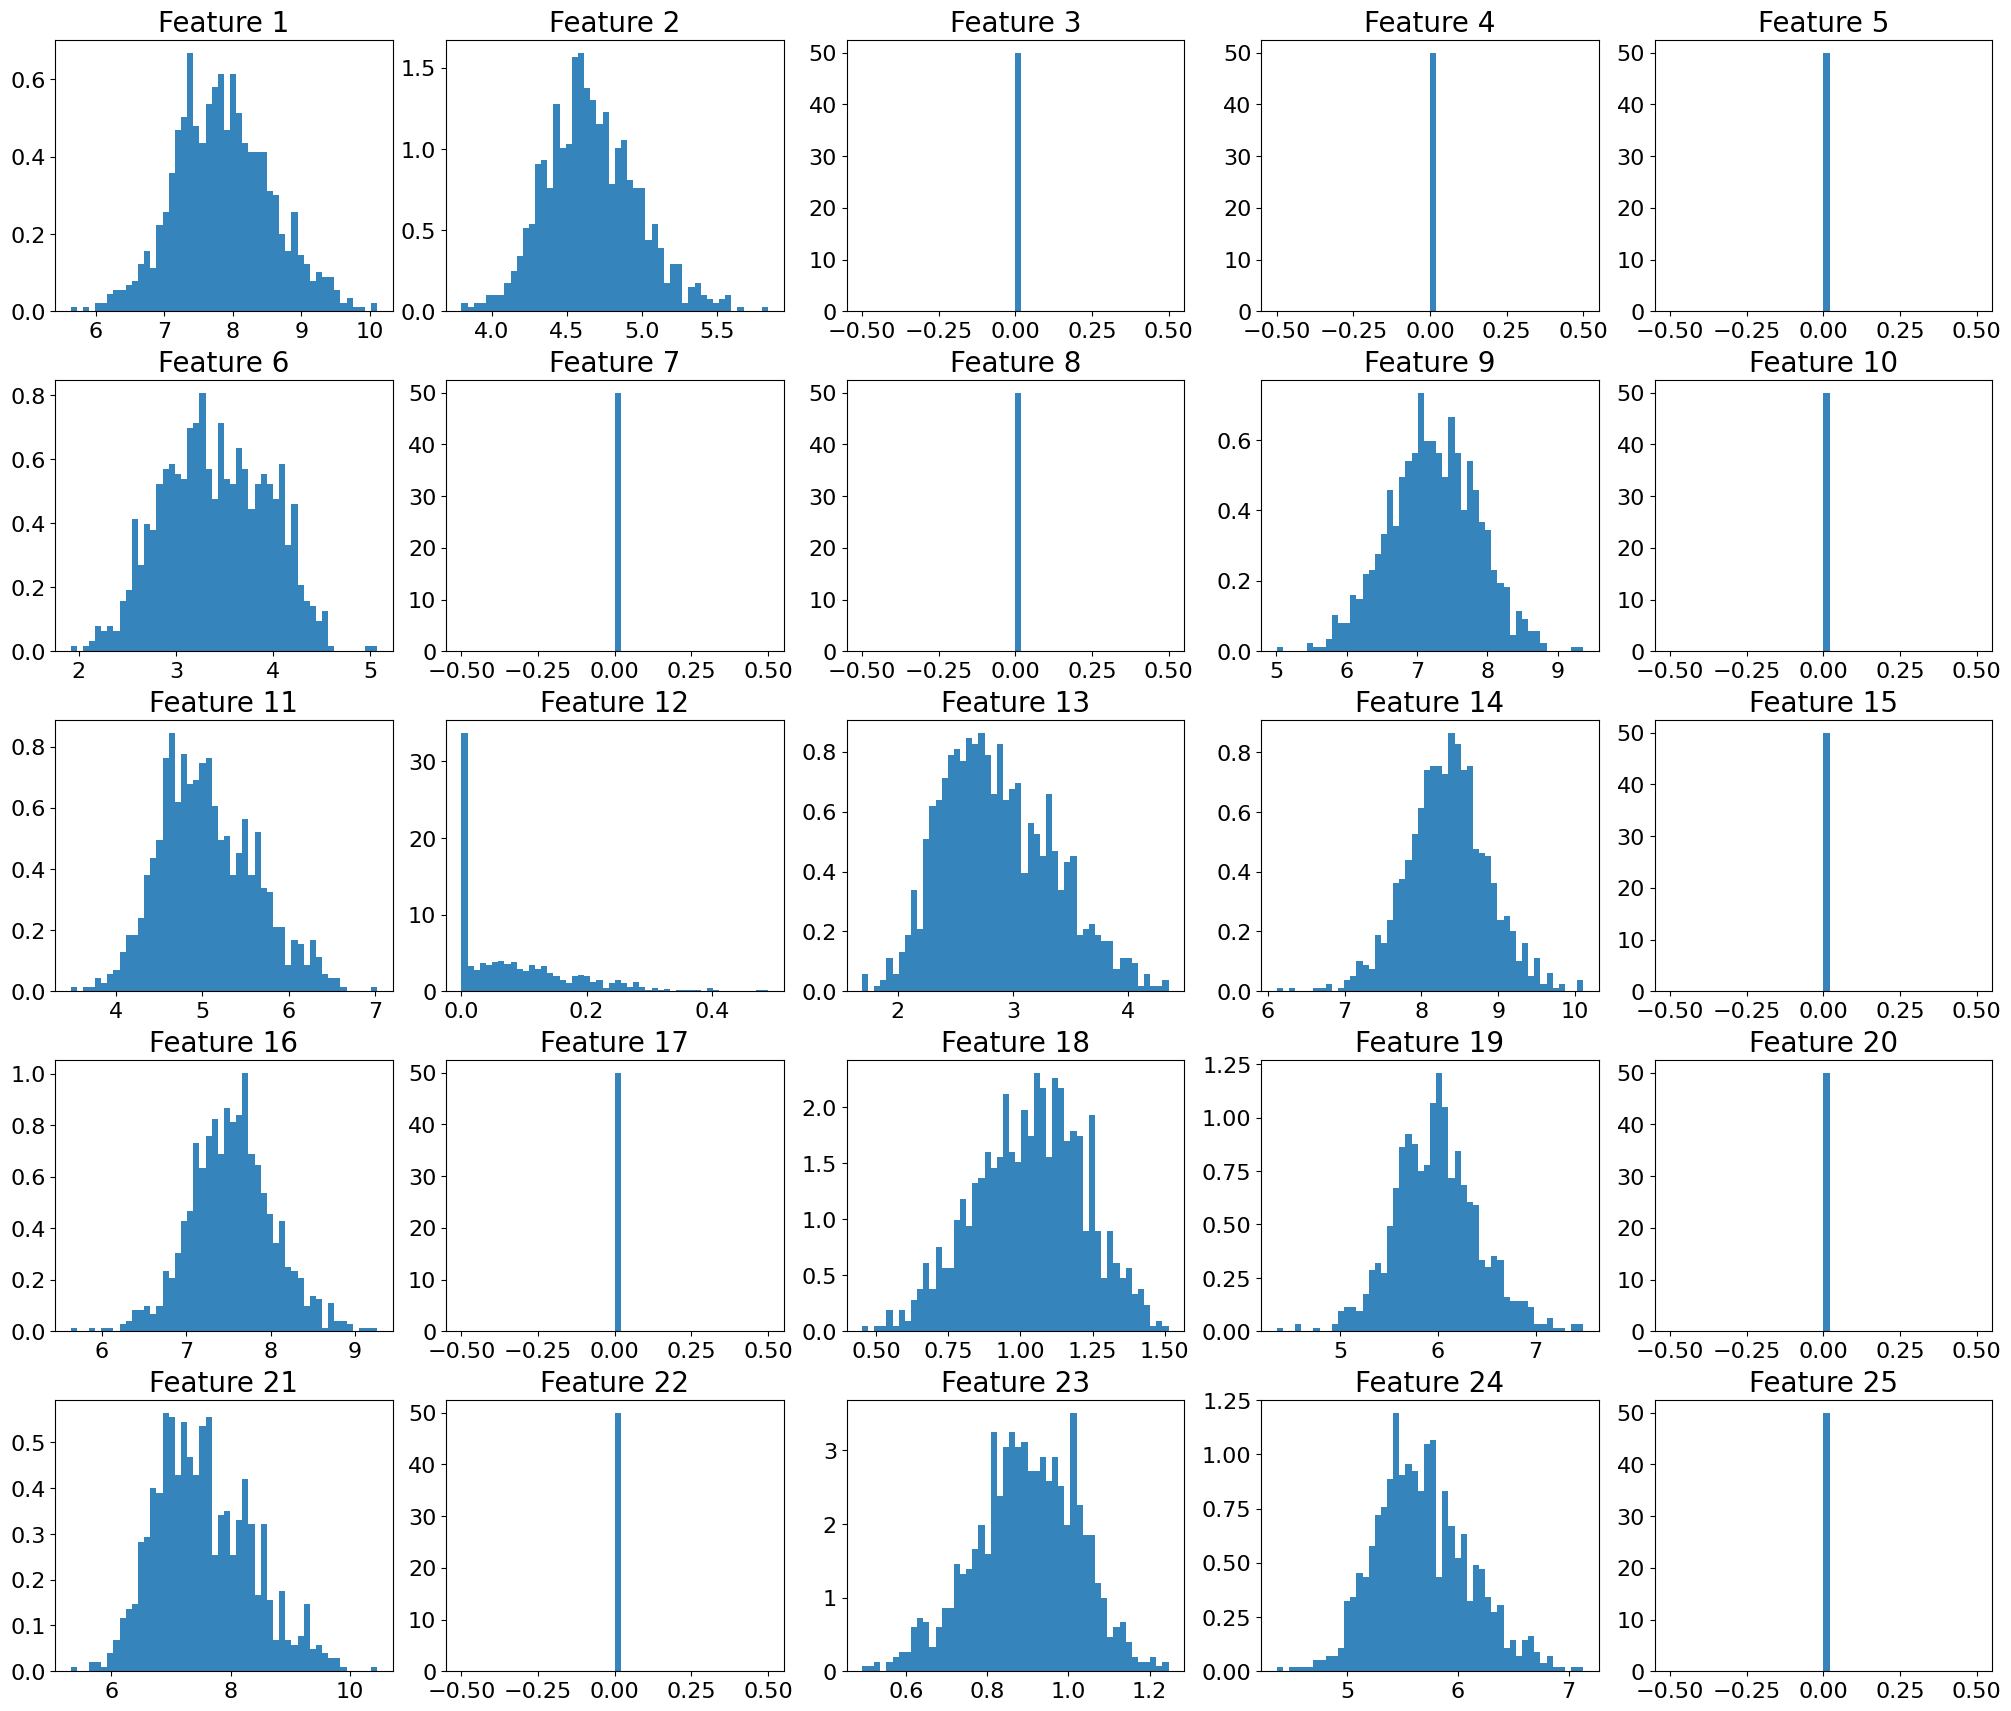

In [90]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20, 17), constrained_layout=True)
plt.rcParams.update({'font.size': 16})

encoded_signals = encoder_relu.predict(X)

for i in range(25):
    row = i // 5
    col = i % 5
    latent_feature = encoded_signals[:, i]
    ax[row, col].hist(latent_feature, bins=50, density=True, alpha=0.9, color='tab:blue')
    xmin, xmax = ax[row, col].set_xlim()
    x = np.linspace(xmin, xmax, 100)
    ax[row, col].set_title(f'Feature {i+1}', fontsize=20)

plt.savefig('../../figures/autoencoder_latent_features_relu.pdf', bbox_inches='tight')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


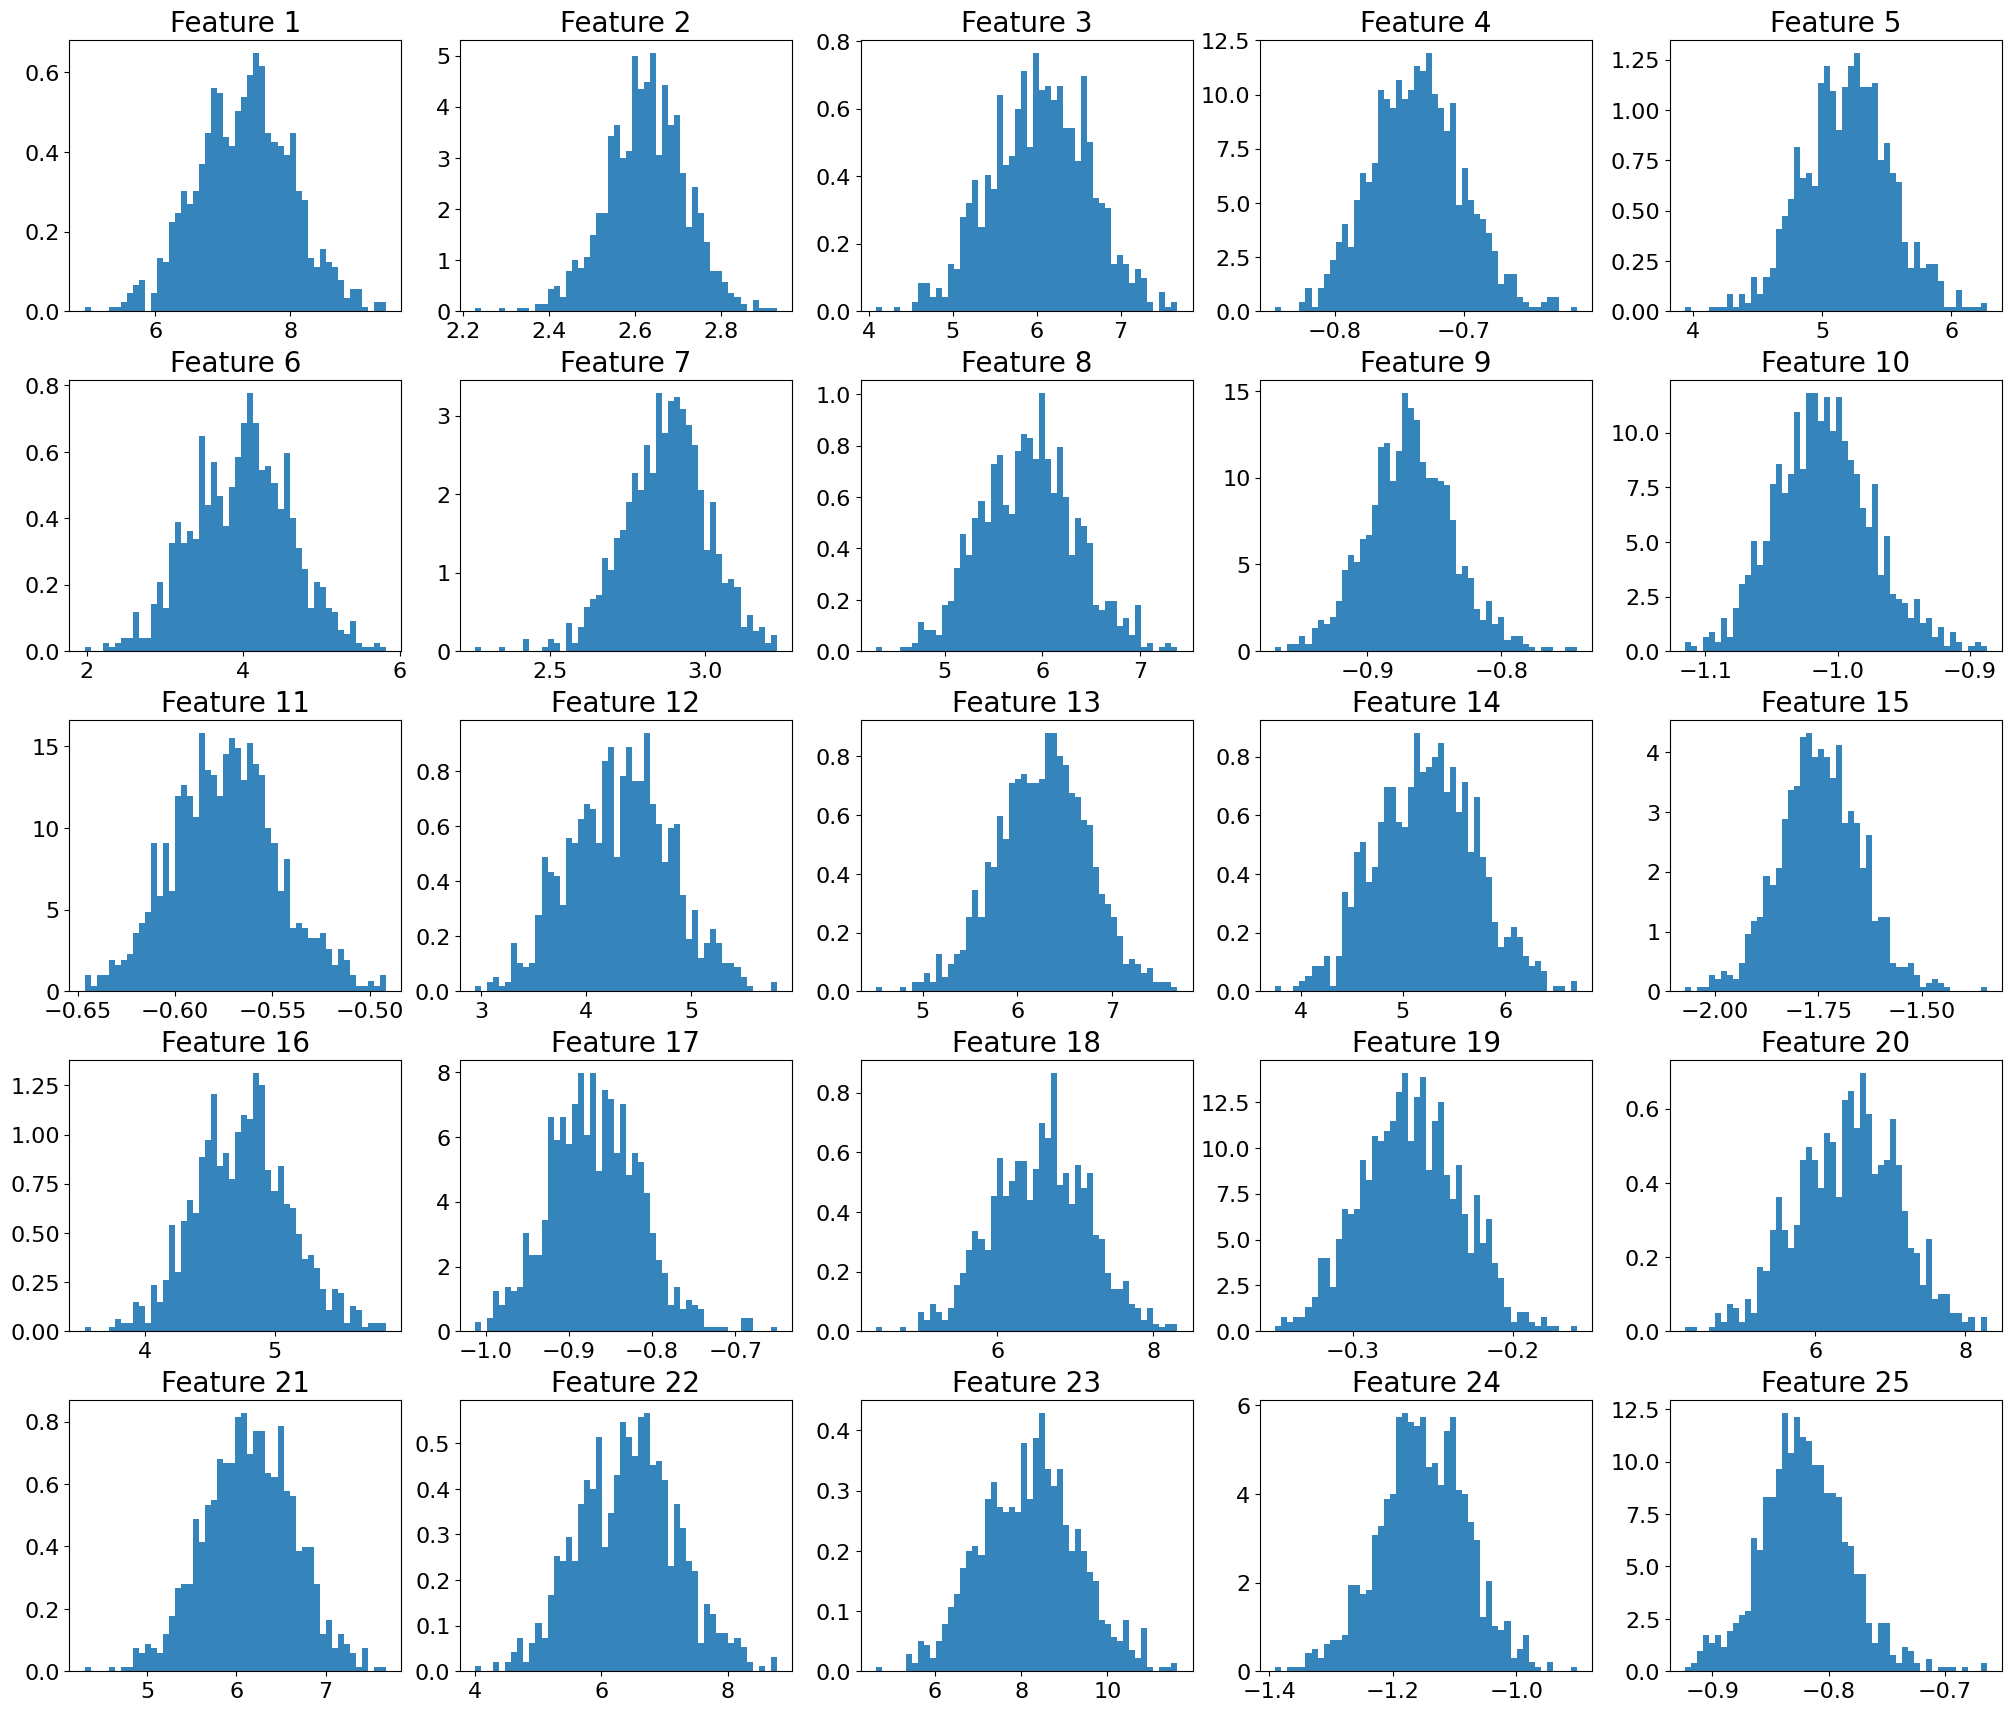

In [91]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20, 17), constrained_layout=True)
plt.rcParams.update({'font.size': 16})

encoded_signals = encoder_leaky.predict(X)

for i in range(25):
    row = i // 5
    col = i % 5
    latent_feature = encoded_signals[:, i]
    ax[row, col].hist(latent_feature, bins=50, density=True, alpha=0.9, color='tab:blue')
    xmin, xmax = ax[row, col].set_xlim()
    x = np.linspace(xmin, xmax, 100)
    ax[row, col].set_title(f'Feature {i+1}', fontsize=20)

plt.savefig('../../figures/autoencoder_latent_features_leaky.pdf', bbox_inches='tight')
plt.show()